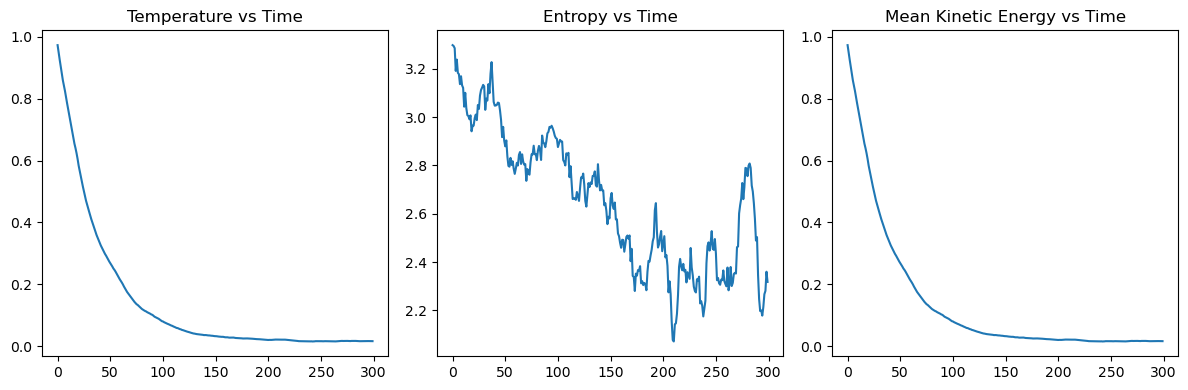

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy
import networkx as nx
from typing import List

class Agent:
    def __init__(self, pos, vel, mass=1.0, temp=1.0, energy=10.0):
        self.pos = np.array(pos, dtype=float)
        self.vel = np.array(vel, dtype=float)
        self.mass = mass
        self.temp = temp  # Temperature
        self.energy = energy

    def update(self, force, dt, noise_std=0.01):
        # Langevin-style update with stochasticity
        thermal_noise = np.random.normal(0, noise_std, size=2)
        acceleration = force / self.mass
        self.vel += dt * (acceleration - 0.1 * self.vel) + thermal_noise
        self.pos += self.vel * dt
        self.energy -= 0.05 * np.linalg.norm(self.vel)  # energy cost

class ThermoFlock:
    def __init__(self, n_agents=100, space_size=100):
        self.agents: List[Agent] = []
        for _ in range(n_agents):
            angle = np.random.uniform(0, 2 * np.pi)
            speed = np.random.uniform(0.5, 2.0)
            pos = np.random.rand(2) * space_size
            vel = speed * np.array([np.cos(angle), np.sin(angle)])
            agent = Agent(pos, vel, mass=np.random.uniform(0.8, 1.2), temp=np.random.uniform(0.8, 1.2))
            self.agents.append(agent)
        self.positions = []
        self.velocities = []

    def step(self, dt=0.1, radius=10):
        n = len(self.agents)
        forces = np.zeros((n, 2))
        for i, a in enumerate(self.agents):
            neighbors = [j for j in range(n) if j != i and np.linalg.norm(self.agents[j].pos - a.pos) < radius]
            if not neighbors:
                continue
            avg_vel = np.mean([self.agents[j].vel for j in neighbors], axis=0)
            center = np.mean([self.agents[j].pos for j in neighbors], axis=0)
            cohesion = (center - a.pos) * 0.01
            alignment = (avg_vel - a.vel) * 0.05
            separation = np.sum([(a.pos - self.agents[j].pos) / np.linalg.norm(a.pos - self.agents[j].pos + 1e-6)**2
                                  for j in neighbors if np.linalg.norm(a.pos - self.agents[j].pos) < radius/2], axis=0)
            force = cohesion + alignment + separation
            forces[i] = force
        # Apply update
        for i, a in enumerate(self.agents):
            a.update(forces[i], dt)

        # Store snapshot
        self.positions.append([a.pos.copy() for a in self.agents])
        self.velocities.append([a.vel.copy() for a in self.agents])

    def run(self, steps=300):
        for _ in range(steps):
            self.step()
        return np.array(self.positions), np.array(self.velocities)

def compute_thermo_metrics(velocities):
    E = 0.5 * np.sum(velocities**2, axis=2)  # kinetic energy
    T = np.mean(E, axis=1)
    S = np.array([entropy(np.histogram(E[t], bins=30, density=True)[0] + 1e-8) for t in range(E.shape[0])])
    return E, T, S

if __name__ == "__main__":
    np.random.seed(42)
    flock = ThermoFlock(n_agents=100)
    positions, velocities = flock.run(steps=300)
    E, T, S = compute_thermo_metrics(velocities)

    # Plot Thermodynamic Metrics
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1); plt.plot(T); plt.title("Temperature vs Time")
    plt.subplot(1, 3, 2); plt.plot(S); plt.title("Entropy vs Time")
    plt.subplot(1, 3, 3); plt.plot(E.mean(axis=1)); plt.title("Mean Kinetic Energy vs Time")
    plt.tight_layout()
    plt.show()


In [34]:
import pandas as pd
df = pd.read_csv('C:/Users/victo/OneDrive/Desktop/Thermodynamic_Simulation_Data.csv')
print(df)

     Time  Temperature   Entropy       Volume  Internal_Energy         dQ
0       0     0.940036  2.605863    13.062950        94.003562  28.000728
1       1     0.966220  2.400358    38.445247        96.621994  25.598950
2       2     1.065794  2.509257    51.684996       106.579417  28.729289
3       3     1.185015  2.748933    74.024321       118.501497  11.228624
4       4     0.998746  2.669185    80.847035        99.874626  13.151795
..    ...          ...       ...          ...              ...        ...
145   145     1.034719  2.946665  3200.264525       103.471919  62.601768
146   146     0.973511  2.702236  3272.870875        97.351082  35.518079
147   147     1.109018  2.703614  3263.870834       110.901767 -11.442343
148   148     1.135386  2.181013  3233.798659       113.538612  -9.322722
149   149     0.972745  2.729960  3258.852685        97.274472   8.789887

[150 rows x 6 columns]


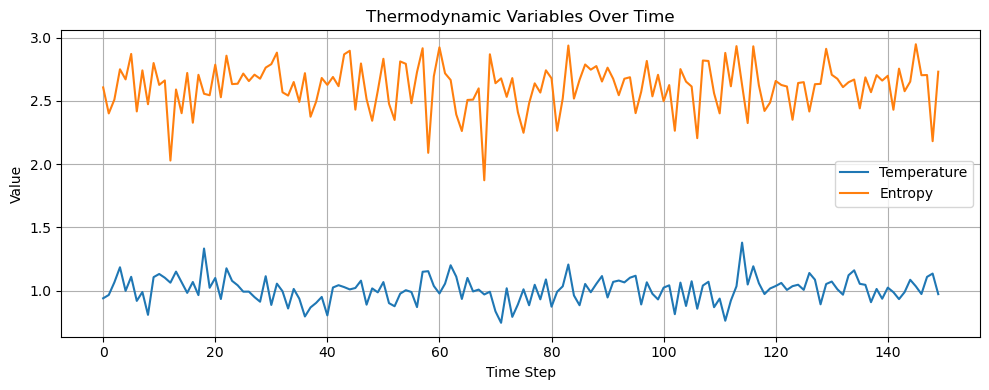

In [35]:
# Import pandas to fix the missing import for dataframe creation
import pandas as pd
import matplotlib.pyplot as plt

# Displaying the thermodynamic results as a DataFrame
thermo_df = pd.DataFrame({
    'Timestep': np.arange(len(thermo_data['Temperature'])),
    'Temperature': thermo_data['Temperature'],
    'Entropy': thermo_data['Entropy'],
    'Volume': thermo_data['Volume'],
    'HeatFlow': thermo_data['dQ']
})

plt.figure(figsize=(10, 4))
plt.plot(thermo_data['Time'], thermo_data['Temperature'], label='Temperature')
plt.plot(thermo_data['Time'], thermo_data['Entropy'], label='Entropy')
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.title("Thermodynamic Variables Over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


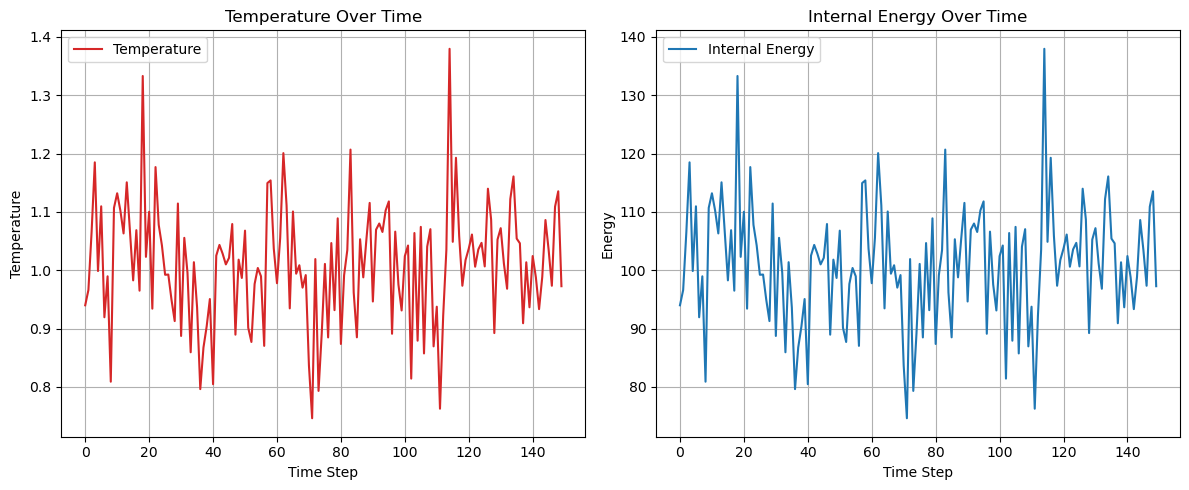

In [36]:
import matplotlib.pyplot as plt

# Assuming `thermo_data` is already defined in the environment
# Plotting Temperature vs Time and Energy vs Time

plt.figure(figsize=(12, 5))

# Temperature vs Time
plt.subplot(1, 2, 1)
plt.plot(thermo_data["Time"], thermo_data["Temperature"], color='tab:red', label="Temperature")
plt.xlabel("Time Step")
plt.ylabel("Temperature")
plt.title("Temperature Over Time")
plt.grid(True)
plt.legend()

# Energy vs Time
plt.subplot(1, 2, 2)
plt.plot(thermo_data["Time"], thermo_data["Internal_Energy"], color='tab:blue', label="Internal Energy")
plt.xlabel("Time Step")
plt.ylabel("Energy")
plt.title("Internal Energy Over Time")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


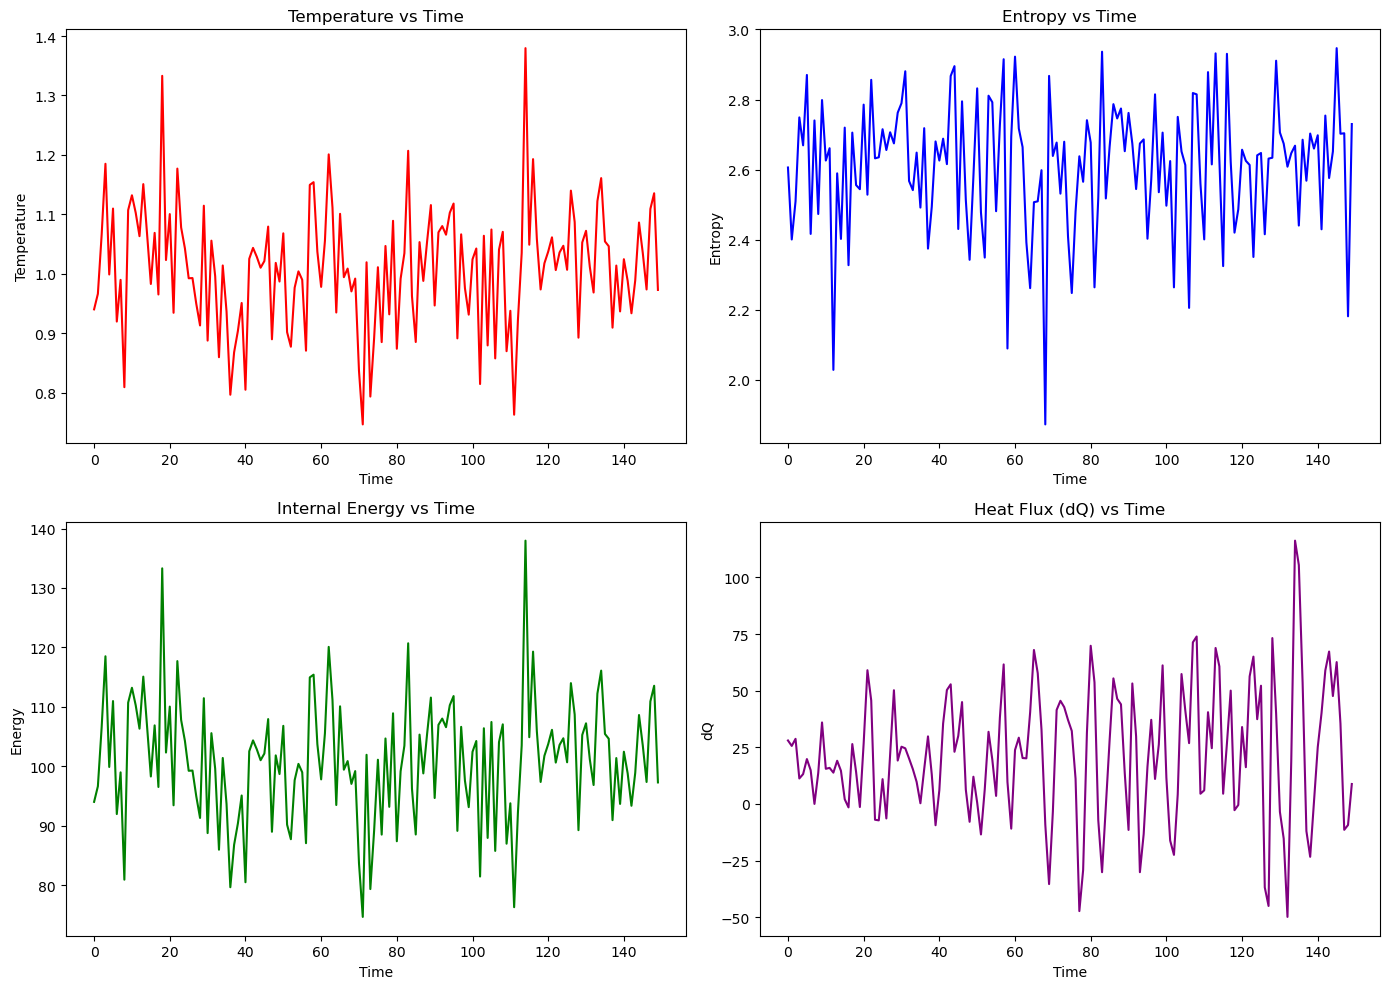

In [37]:
import matplotlib.pyplot as plt

# Create subplots for multiple thermodynamic variables
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Temperature vs Time
axs[0, 0].plot(thermo_data["Time"], thermo_data["Temperature"], color='red')
axs[0, 0].set_title("Temperature vs Time")
axs[0, 0].set_xlabel("Time")
axs[0, 0].set_ylabel("Temperature")

# Entropy vs Time
axs[0, 1].plot(thermo_data["Time"], thermo_data["Entropy"], color='blue')
axs[0, 1].set_title("Entropy vs Time")
axs[0, 1].set_xlabel("Time")
axs[0, 1].set_ylabel("Entropy")

# Internal Energy vs Time
axs[1, 0].plot(thermo_data["Time"], thermo_data["Internal_Energy"], color='green')
axs[1, 0].set_title("Internal Energy vs Time")
axs[1, 0].set_xlabel("Time")
axs[1, 0].set_ylabel("Energy")

# Heat Flux (dQ) vs Time
axs[1, 1].plot(thermo_data["Time"], thermo_data["dQ"], color='purple')
axs[1, 1].set_title("Heat Flux (dQ) vs Time")
axs[1, 1].set_xlabel("Time")
axs[1, 1].set_ylabel("dQ")

plt.tight_layout()
plt.show()


In [38]:
pip install pyinform


In [39]:
import numpy as np
import networkx as nx
from scipy.spatial.distance import cdist
from pyinform.transferentropy import transfer_entropy
from tqdm import tqdm

def compute_TE_matrix(
    velocities, 
    positions, 
    window=50, 
    step=10, 
    radius=15, 
    bins=10, 
    k=1
):
    """
    Computes the Transfer Entropy matrix between all agent pairs over time.

    Parameters:
    - velocities: np.array of shape [T, N, 2]
    - positions: np.array of shape [T, N, 2]
    - window: int, sliding window size
    - step: int, sliding step size
    - radius: float, spatial interaction threshold
    - bins: int, number of bins to discretize speed
    - k: embedding dimension for TE

    Returns:
    - TE_time_series: list of TE matrices [N x N] at each window
    - position_mask: list of pairwise proximity matrices (bool)
    """
    T, N, _ = velocities.shape
    speeds = np.linalg.norm(velocities, axis=2)  # shape [T, N]

    # Discretize speeds for TE analysis
    def discretize(data):
        bins_edges = np.linspace(data.min(), data.max(), bins + 1)
        return np.digitize(data, bins_edges) - 1

    discrete_speeds = discretize(speeds)

    TE_time_series = []
    position_mask = []

    for t in tqdm(range(0, T - window, step), desc="Computing TE"):
        speeds_win = discrete_speeds[t:t + window]  # [window, N]
        pos_win = positions[t + window - 1]  # use final timestep of window

        TE = np.zeros((N, N))
        dist = cdist(pos_win, pos_win)
        within_R = (dist < radius) & (dist > 0)

        for i in range(N):
            for j in range(N):
                if within_R[i, j]:
                    try:
                        TE[i, j] = transfer_entropy(
                            speeds_win[:, i].tolist(),
                            speeds_win[:, j].tolist(),
                            k=k
                        )
                    except:
                        TE[i, j] = 0.0

        TE_time_series.append(TE)
        position_mask.append(within_R)

    return TE_time_series, position_mask


In [41]:
# Use your actual experimental data (already in memory)
velocities = all_velocities[0]  # shape: [T, N, 2]
positions = all_positions[0]   # shape: [T, N, 2]

# Run the Transfer Entropy analysis
TE_series, proximity_masks = compute_TE_matrix(
    velocities=velocities,
    positions=positions,
    window=50,
    step=10,
    radius=12,
    bins=8,
    k=1
)


NameError: name 'all_velocities' is not defined

In [40]:
TE_series, proximity_masks = compute_TE_matrix(
    velocities=your_vel_array,
    positions=your_pos_array,
    window=50,
    step=10,
    radius=12,
    bins=8,
    k=1
)


NameError: name 'your_vel_array' is not defined